### reference : https://arxiv.org/abs/1608.03981
### reference : https://github.com/cszn/DnCNN
### reference : https://github.com/yjn870/DnCNN-pytorch

In [1]:
import torch
from torch import nn

In [2]:
class DnCNN(nn.Module):
    def __init__(self, num_layers=17, num_features=64):
        super(DnCNN, self).__init__()
        layers = [nn.Sequential(nn.Conv2d(1, num_features, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(inplace=True))]
        for i in range(num_layers - 2):
            layers.append(nn.Sequential(nn.Conv2d(num_features, num_features, kernel_size=3, padding=1),
                                        nn.BatchNorm2d(num_features),
                                        nn.ReLU(inplace=True)))
        layers.append(nn.Conv2d(num_features, 1, kernel_size=3, padding=1))
        self.layers = nn.Sequential(*layers)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, inputs):
        y = inputs
        residual = self.layers(y)
        return y - residual

In [20]:
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(net_DNCNN.parameters(), lr=lr)

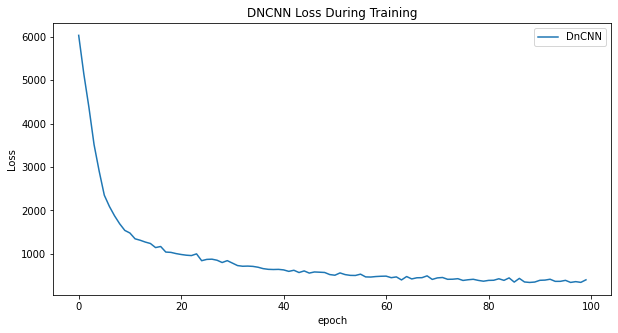

In [26]:
plt.figure(figsize=(10,5))
plt.title("DNCNN Loss During Training")
plt.plot(losses,label="DnCNN")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

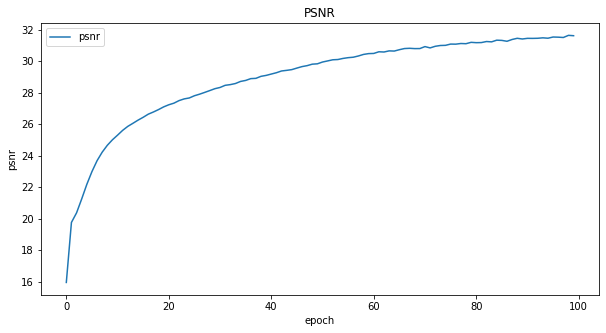

In [27]:
plt.figure(figsize=(10,5))
plt.title("PSNR")
plt.plot(p,label="psnr")
plt.xlabel("epoch")
plt.ylabel("psnr")
plt.legend()
plt.show()

# image 시각화

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

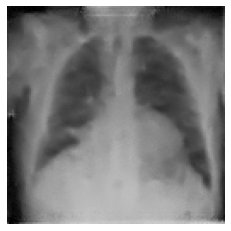

In [27]:
plt.imshow(np.transpose(utils.make_grid(f[0][7]).cpu(),(1,2,0)))
plt.axis('off')

### PSNR

In [44]:
res_psnr = []
for i in range(len(r)):
    for j in range(22):
        res_psnr.append(PSNR(r[i][j], f[i][j]))

In [47]:
# PSNR
np.mean(res_psnr)

31.8677808213033

### SSIM

In [48]:
from skimage.metrics import structural_similarity as ssim
res_ssim = []
for i in range(len(r)):
    # 마지막에 들어가는 batch_size 크기만큼 반복
    for j in range(22):
        c = r[i][j].squeeze()
        d =  f[i][j].squeeze()
        score = ssim(np.array(c), np.array(d))
        res_ssim.append(score)

In [51]:
np.mean(result_s)

0.9358982910940866

### MAE

In [52]:
mae_loss = nn.L1Loss()
res_mae = []
for i in range(len(r)):
    for j in range(22):
        res_mae.append(mae_loss(r[i][j], f[i][j]))
print("MAE")
np.mean(mae)

MAE


0.018976927